# <center> <font style="color:rgb(100,109,254)">  Contours, More Functions  </font> </center>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### <font style="color:rgb(134,19,348)"> Extracting Large Contours </font>
You can extract the largest contour in the image by using the function `max(contours, key = cv2.contourArea)` which finds the max contour with respect to Area.

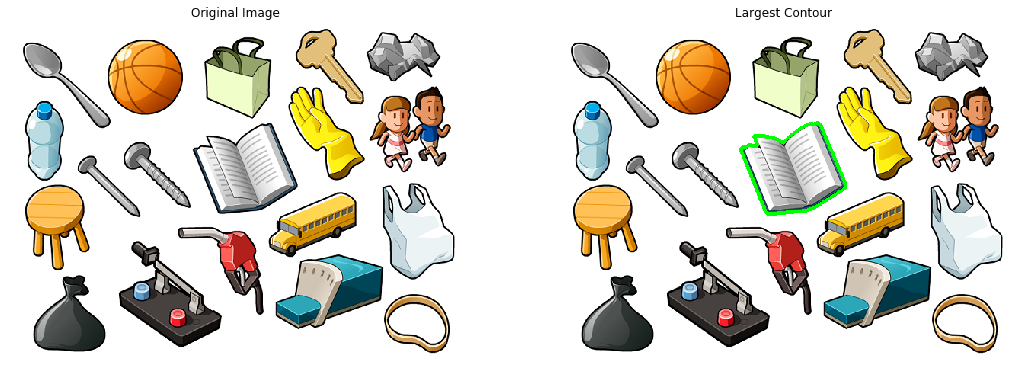

In [2]:
img = cv2.imread('media/M4/scontour2.png')  
original = img.copy()

edges = cv2.Canny(img,50,200)

contours, hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

# largest contour
cnt = max(contours, key = cv2.contourArea) 

# draw the extracted contour only
cv2.drawContours(img, [cnt], 0, (0,255,0), 3) 

plt.figure(figsize=[18,18])
plt.subplot(121);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(122);plt.imshow(img[:,:,::-1]);plt.title("Largest Contour");plt.axis('off');

**So in all the objects above the largest in area is the book**

**You can also extract nth large contours by sorting it with respect to size**

For example: `newlist = sorted(contours, key=cv2.contourArea, reverse= True)` This will sort the contours list in decreasing order with respect to area. We can now take the top nth contours from this new list: `top = newlist[:3]`

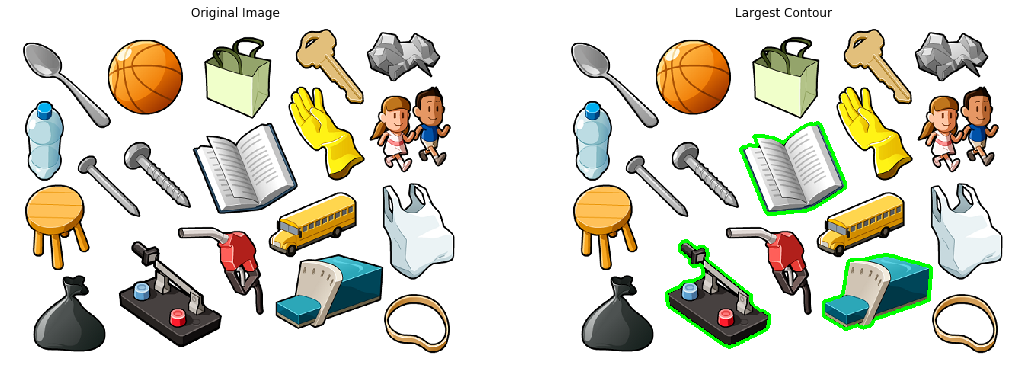

In [3]:
img = cv2.imread('media/M4/scontour2.png')  
original = img.copy()

edges = cv2.Canny(img,50,200)

contours, hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

# make a sorted list according to area
newlist = sorted(contours, key=cv2.contourArea, reverse= True)

# extract top 3 largest contours
top = newlist[:3]

# draw all given contours
cv2.drawContours(img, top, -1, (0,255,0), 3) 

plt.figure(figsize=[18,18])
plt.subplot(121);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(122);plt.imshow(img[:,:,::-1]);plt.title("Largest Contour");plt.axis('off');

##  <font style="color:rgb(134,19,348)"> Arc Length </font>
Arc length is the distance between two points along a section of a curve. Now in terms of contour the arc length is the perimeter of the contour or its boundary length.

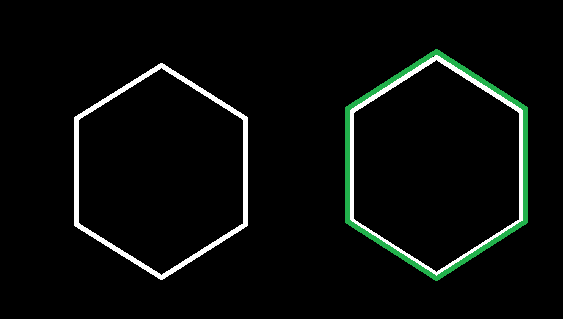

In opencv you can get the arc length of any individual contour by using:

[```retval = cv2.arcLength(curve, closed)```](https://docs.opencv.org/4.2.0/d3/dc0/group__imgproc__shape.html#ga8d26483c636be6b35c3ec6335798a47c)

- `curve`	Input vector of 2D points.
- `closed`	Flag indicating whether the curve is closed or not.


In [4]:
# just grab any individual contour
cnt = contours[0]
# then compute its arc length
cv2.arcLength(cnt, True)

275.0365778207779

## <font style="color:rgb(134,19,348)"> Contour Approximation </font>

Contour approximation is a method which approximates a contour shape to another shape with less number of vertices depending upon the precision we set. <br>

Suppose you are trying to find a square in an image, but due to some problems in the image, you did not get a perfect square, but a 'bad shape' ("shown in image below"). Now you can use this function to approximate the shape.

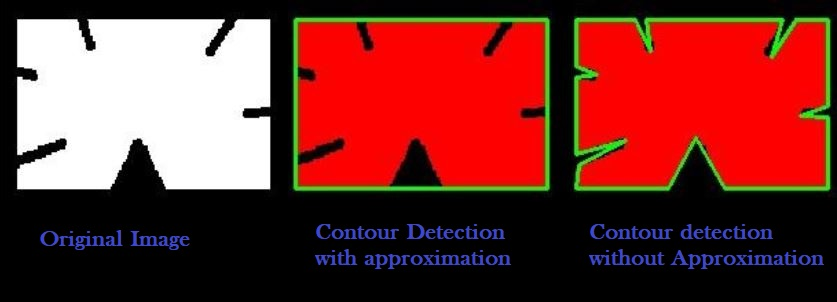

[```approxCurve = cv.approxPolyDP(	curve, epsilon, closed[, approxCurve]	)```](https://docs.opencv.org/4.2.0/d3/dc0/group__imgproc__shape.html#ga0012a5fdaea70b8a9970165d98722b4c)

- `curve`	Input vector of a 2D points
- `approxCurve`	Result of the approximation. The type should match the type of the input curve.
- `epsilon`	Parameter specifying the approximation accuracy. This is the maximum distance between the original curve and its approximation.
- `closed`	If true, the approximated curve is closed (its first and last vertices are connected). Otherwise, it is not closed.

In this, epsilon, which is maximum distance from contour to approximated contour  is an accuracy parameter. A wise selection of epsilon is needed to get the correct output. Normally we set epsilon to some small percentage of arc length.

Now lets draw one contour without approximation and one with.

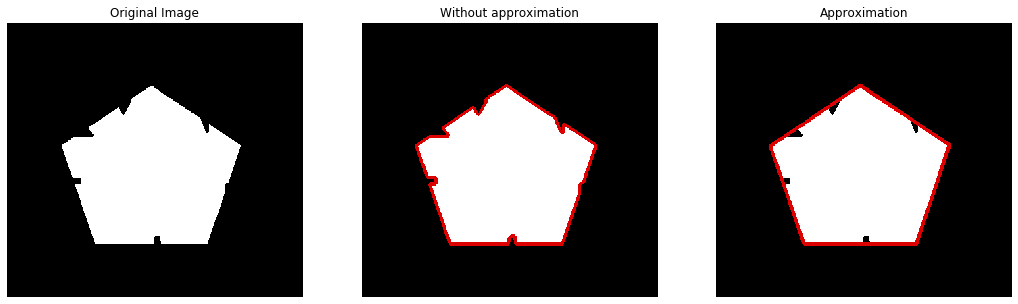

In [5]:
img = cv2.imread('media/M4/approxgaps.PNG',1)
approx_img = img.copy()
without_approx = img.copy()

edges = cv2.Canny(img,50,200)

contours,hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# Since the image only has one contour, grab the first contour.
cnt= contours[0]

# Set the epsilon value according to arc length. This value should be tuned properly
epsilon = 0.03*cv2.arcLength(cnt,True)

# approximate the contour
approx = cv2.approxPolyDP(cnt,epsilon,True)

# draw the approximated contour
cv2.drawContours(approx_img, [approx], 0, (0,0,220), 3)

# draw the non approximated contour
cv2.drawContours(without_approx, [cnt], 0, (0,0,220), 3)

plt.figure(figsize=[18,18])
plt.subplot(131);plt.imshow(img[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(132);plt.imshow(without_approx[:,:,::-1]);plt.title("Without approximation");plt.axis('off');
plt.subplot(133);plt.imshow(approx_img[:,:,::-1]);plt.title("Approximation");plt.axis('off');

##  <font style="color:rgb(134,19,348)"> Convex Hull </font>
Convex Hull will look similar to contour approximation, but it is not (Both may provide same results in some cases). This function checks a curve for convexity defects and corrects it. Convex curves are curves which are bulged out. And if it is bulged inside, it is called convexity defects.<br>
<br>

[```hull = cv2.convexHull(	points[, hull[, clockwise[, returnPoints]]]	)```](https://docs.opencv.org/4.2.0/d3/dc0/group__imgproc__shape.html#ga014b28e56cb8854c0de4a211cb2be656)

- `points`	Input 2D point set. This is a single contour.
- `hull`	Output convex hull. It is either an integer vector of indices or vector of points. In the first case, the hull elements are 0-based indices of the convex hull points in the original array (since the set of convex hull points is a subset of the original point set). In the second case, hull elements are the convex hull points themselves.
- `clockwise`	Orientation flag. If it is true, the output convex hull is oriented clockwise. Otherwise, it is oriented counter-clockwise. The assumed coordinate system has its X axis pointing to the right, and its Y axis pointing upwards.
- `returnPoints`	Operation flag. In case of a matrix, when the flag is true, the function returns convex hull points. Otherwise, it returns indices of the convex hull points. By default its True.s

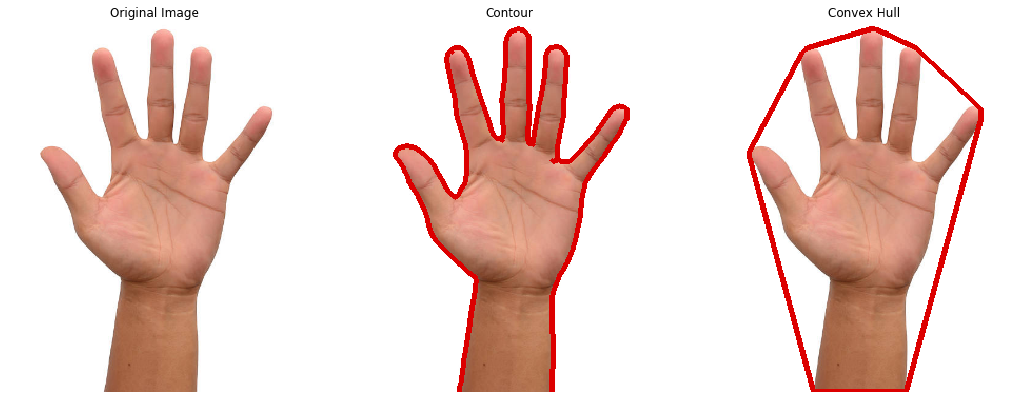

In [6]:
img = cv2.imread('media/M4/chand.PNG',1)
hull_img = img.copy()
without_hull = img.copy()

edges = cv2.Canny(img,100,400)

contours,hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# Since the image only has one contour, grab the first contour.
cnt = contours[0]

# # get the required hull
hull = cv2.convexHull(cnt)

# draw the hull
cv2.drawContours(hull_img, [hull], 0 , (0,0,220), 3) 

# draw the contour
cv2.drawContours(without_hull, [cnt], 0, (0,0,220), 3)

plt.figure(figsize=[18,18])
plt.subplot(131);plt.imshow(img[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(132);plt.imshow(without_hull[:,:,::-1]);plt.title("Contour");plt.axis('off');
plt.subplot(133);plt.imshow(hull_img[:,:,::-1]);plt.title("Convex Hull");plt.axis('off');

## <font style="color:rgb(134,19,348)"> Straight Bounding Rectangle </font>
You can draw a rectangular box around your detected object with `cv2.boundingRect()`

[```x,y,w,h = cv2.boundingRect(array)```](https://docs.opencv.org/4.2.0/d3/dc0/group__imgproc__shape.html#ga103fcbda2f540f3ef1c042d6a9b35ac7)

- **`array`**	 A 2D point set, this array is mostly any single Contour.

Now this is a straight rectangle, it does not consider the rotation of the object. So area of the bounding rectangle won’t be minimum. It is found by the function cv2.boundingRect().

Let (x,y) be the top-left coordinate of the rectangle and (w,h) be its width and height.

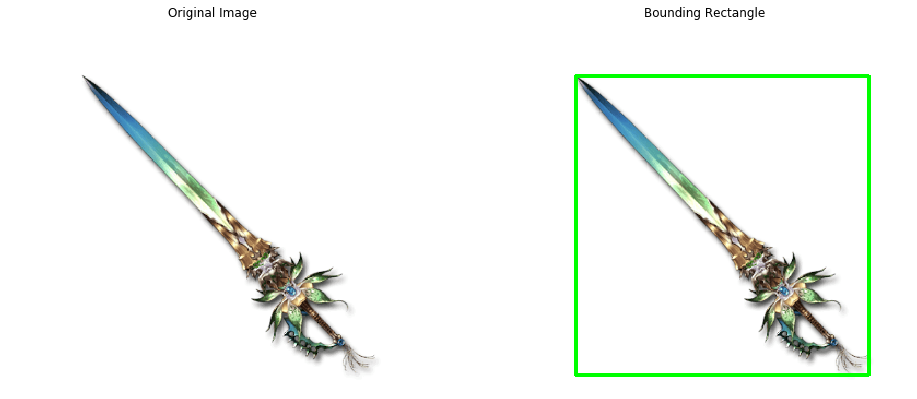

In [7]:
img = cv2.imread('media/M4/sword1.PNG',1)
original = img.copy()

grayimg= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(grayimg,234,255,cv2.THRESH_BINARY_INV)  

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

#grab the first contour
cnt= contours[0]

# get the bonding box coordinates for the specified contour and draw it
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

plt.figure(figsize=[25,25])
plt.subplot(131);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(132);plt.imshow(img[:,:,::-1]);plt.title("Bounding Rectangle");plt.axis('off');

## <font style="color:rgb(134,19,348)"> Rotated Rectangle  </font>
We can also enclose our contour with a rotated rectangle which even takes lesser space, here, bounding rectangle is drawn with minimum area, so it considers the rotation also. The function used is `cv2.minAreaRect()`. It contains center (x,y), (width, height), angle of rotation ). 

[```retval = cv.minAreaRect(points)```](https://docs.opencv.org/4.2.0/d3/dc0/group__imgproc__shape.html#ga3d476a3417130ae5154aea421ca7ead9)


- `points`	Input vector of 2D points
- `retval:` returns the minimum-area bounding rectangle (possibly rotated) for a specified point set

But to draw this rectangle, we need 4 corners of the rectangle. It is obtained by passing the output of the above function to the function `cv2.boxPoints()`

[```points = cv2.boxPoints(box[,points])```](https://docs.opencv.org/4.2.0/d3/dc0/group__imgproc__shape.html#gaf78d467e024b4d7936cf9397185d2f5c)

- `box`	The input rotated rectangle. It may be the output of
- `points`	The output array of four vertices of rectangles.


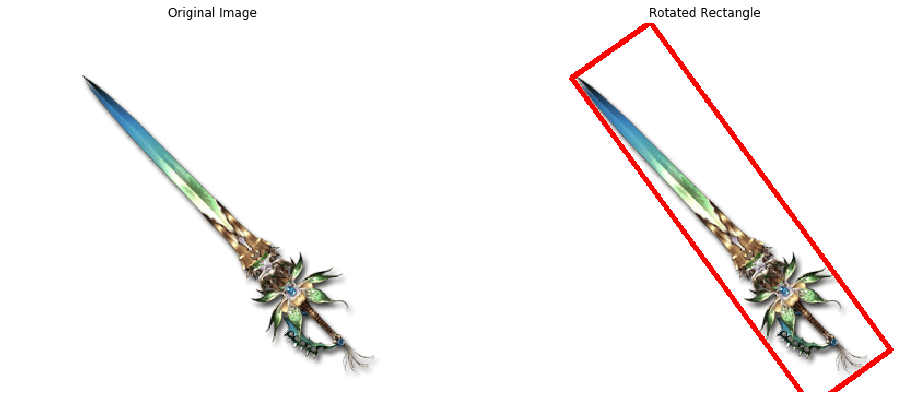

In [8]:
img = original.copy()

# calculate the minArea Bounding rect
rect = cv2.minAreaRect(cnt)

# convert the rect object to box points
box =  cv2.boxPoints(rect).astype('int')

cv2.drawContours(img,[box],0,(0,0,255),3)

plt.figure(figsize=[25,25])
plt.subplot(131);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(132);plt.imshow(img[:,:,::-1]);plt.title("Rotated Rectangle");plt.axis('off');

**See the output of minArearect, it returns 4 points (center, height and width ) and the angle of rotation** 

In [9]:
rect

((211.48367309570312, 174.9715576171875),
 (88.84554290771484, 373.1758728027344),
 -36.16462707519531)

**Now these points are modified to new points by taking into account the angle of rotation**

In [10]:
box

array([[285, 351],
       [ 65,  50],
       [137,  -1],
       [357, 299]])

## <font style="color:rgb(134,19,348)">Minimum Enclosing Circle </font>
We can also find the circumcircle of an object using the function `cv2.minEnclosingCircle()`. It is a circle which completely covers the object with minimum area.

[```center, radius = cv.minEnclosingCircle(	points	)```](https://docs.opencv.org/4.2.0/d3/dc0/group__imgproc__shape.html#ga8ce13c24081bbc7151e9326f412190f1)

center, radius	=	cv.minEnclosingCircle(	points	)


- `points`	Input vector of 2D points.
- `center`	Output center of the circle.
- `radius`	Output radius of the circle.



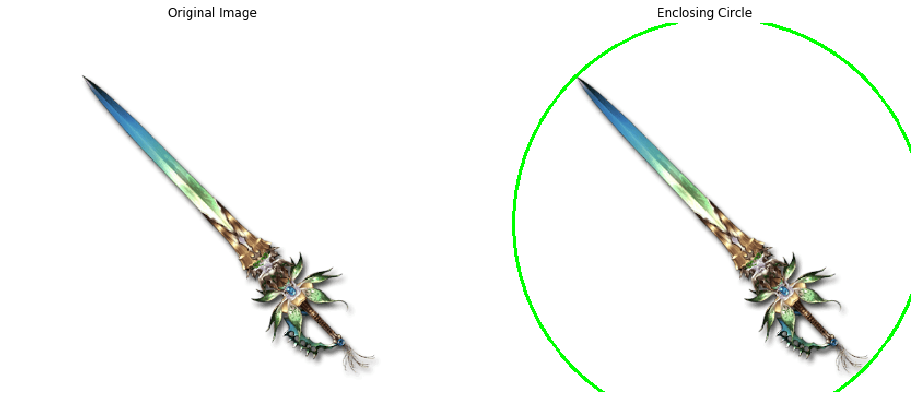

In [11]:
img = original.copy()

(x,y),radius = cv2.minEnclosingCircle(cnt)

# convert the center and radius points to ints 
center = (int(x),int(y))
radius = int(radius)

#draw the circle using center, radius
cv2.circle(img,center,radius,(0,255,0),2)

plt.figure(figsize=[25,25])
plt.subplot(131);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(132);plt.imshow(img[:,:,::-1]);plt.title("Enclosing Circle");plt.axis('off');

## <font style="color:rgb(134,19,348)"> Fitting an Ellipse </font>
You can also fit an ellipse to an object using `cv2.fitEllipse()` It returns the rotated rectangle in which the ellipse is inscribed.

[```retval	=	cv.fitEllipse(	points)```](https://docs.opencv.org/4.2.0/d3/dc0/group__imgproc__shape.html#gaf259efaad93098103d6c27b9e4900ffa)

- `points`	Input vector of 2D points.

After this you can draw this ellipse using `cv2.ellipse()`

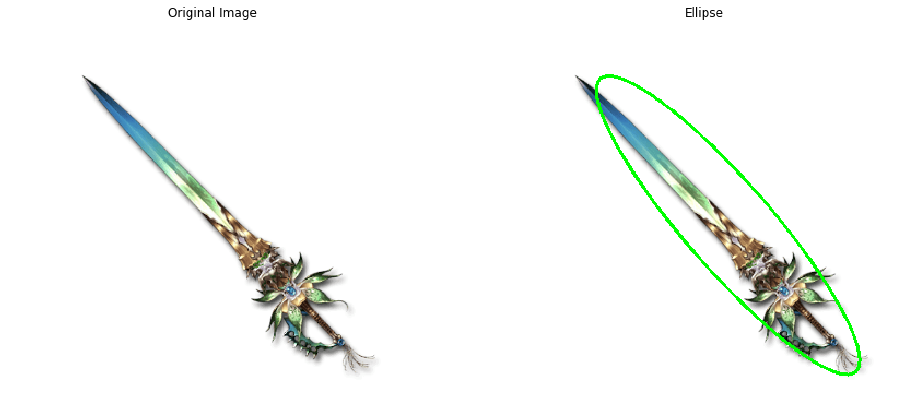

In [12]:
img = original.copy()

ellipse = cv2.fitEllipse(cnt)
cv2.ellipse(img,ellipse,(0,255,0),2)

plt.figure(figsize=[25,25])
plt.subplot(131);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(132);plt.imshow(img[:,:,::-1]);plt.title("Ellipse");plt.axis('off');

**Yes as you can see the ellipse does not completely encloses the object**

## <font style="color:rgb(134,19,348)"> Convexity Defects </font>
Any deviation of the object from this hull can be considered as convexity defect.

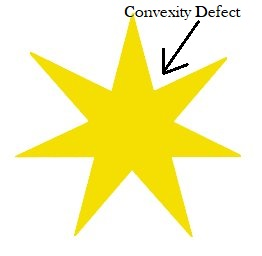

OpenCV comes with a ready-made function to find this, `cv2.convexityDefects()`

First we have to find the indices of hull points, so we have to pass `returnPoints = False` while finding convex hull, in order to find convexity defects.

[```convexityDefects	=	cv.convexityDefects(	contour, convexhull[, convexityDefects]	)```](https://docs.opencv.org/4.2.0/d3/dc0/group__imgproc__shape.html#gada4437098113fd8683c932e0567f47ba)

- `contour`	Input contour.
- `convexhull`	Convex hull obtained using convexHull that should contain indices of the contour points that make the hull.
- `convexityDefects`	The output vector of convexity defects. In C++ and the new Python/Java interface each convexity defect is represented as 4-element integer vector  (start_index, end_index, farthest_pt_index, fixpt_depth), where indices are 0-based indices in the original contour of the convexity defect beginning, end and the farthest point, and fixpt_depth is fixed-point approximation of the distance between the farthest contour point and the hull.

In below example we draw a line joining start point and end point, then draw a circle at the farthest point. Remember first three values returned are indices of contours. So we have to bring those values from contours.

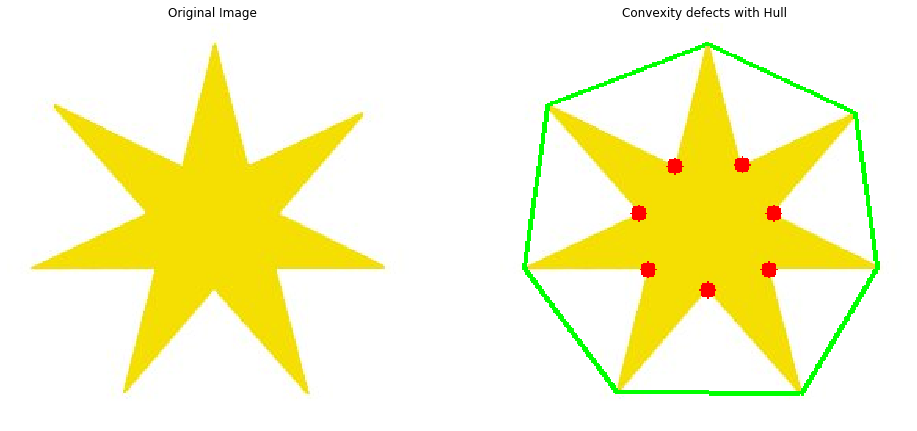

In [13]:
img = cv2.imread('media/M4/cstar.jpg')
original = img.copy()

img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img_gray,234,255,1)  


contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

# pass return points True so that the indexes are returned
hull_indexes = cv2.convexHull(cnt,returnPoints = False)

# use the indexes to find the defects in contour
defects = cv2.convexityDefects(cnt,hull_indexes)

# each row contains these values - [ start point, end point, farthest point, approximate distance to farthest point ]
for row in range(len(defects)):
    
    # we wont be d for now
    s,e,f,d = defects[row,0]  
    start = tuple(cnt[s][0]) 
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    
    # we are drawing the hull by drawing a line from each start point to end point
    cv2.line(img,start,end,[0,255,0],2)
    
    # we are also drawing a circle at the furthest point
    cv2.circle(img,far,5,[0,0,255],-1)

plt.figure(figsize=[25,25])
plt.subplot(131);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(132);plt.imshow(img[:,:,::-1]);plt.title("Convexity defects with Hull");plt.axis('off');

###  <font style="color:rgb(34,169,134)"> Assignment: Real time Object Detection with Color </font>
Build a basic Object detector based on color, use color segmentation or histogram back projection to get a binary mask of a colored object then perform contour detection and put a bounding box around it, make this in real time and with your camera feed

In [ ]:
## ADD CODE HERE

